In [1]:
%%javascript
(function(on) {
const e=$( "<a>Setup failed</a>" );
const ns="js_jupyter_suppress_warnings";
var cssrules=$("#"+ns);
if(!cssrules.length) cssrules = $("<style id='"+ns+"' type='text/css'>div.output_stderr { } </style>").appendTo("head");
e.click(function() {
    var s='Showing';  
    cssrules.empty()
    if(on) {
        s='Hiding';
        cssrules.append("div.output_stderr, div[data-mime-type*='.stderr'] { display:none; }");
    }
    e.text(s+' warnings (click to toggle)');
    on=!on;
}).click();
$(element).append(e);
})(true);

<IPython.core.display.Javascript object>

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import ar2gas as gas
import pygeostat as gs
import numpy as np
import matplotlib.pyplot as plt
import helpers
from scipy.stats import norm
import proportions
import variogram_on_grid

In [4]:
data = gs.DataFile(flname='dataset.csv', x='x', y='y')

C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat

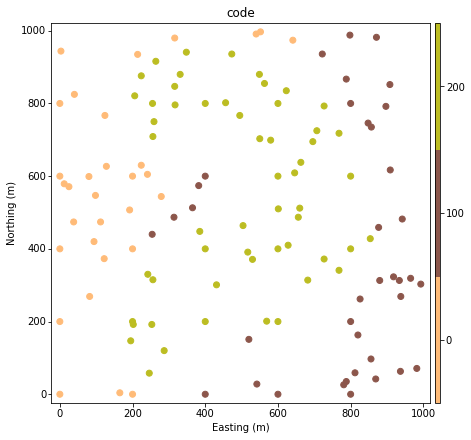

In [5]:
gs.locmap(data, x='x', y='y', figsize=(7,7))

C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat

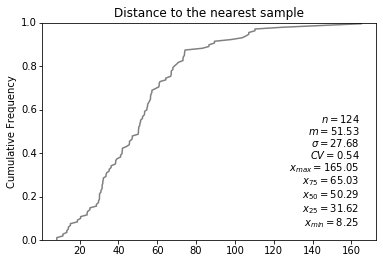

In [6]:
helpers.samples_dist(data.data.x, data.data.y, None)

C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat

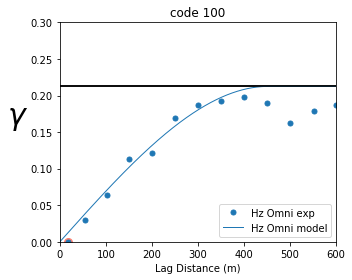

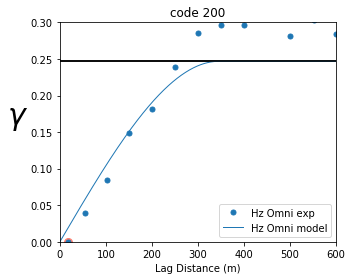

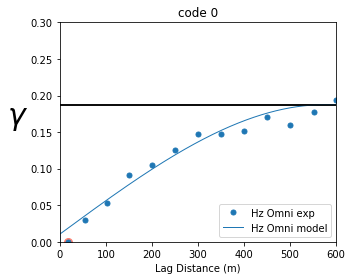

In [7]:
codes = data.data.code.unique()
#fig, axes = plt.subplots(1, 3, figsize=(15,5))
variograms = {}
for idx, c in enumerate(codes):
    data['ind_{}'.format(c)] = np.where((data['code'] == c) == True, 1, 0)
    vario = gs.Variogram(data, 'ind_{}'.format(c), ndim=2, ndir=1, omnihz=True, mute=True, warn=False)
    vario.settols(nlags=12, lagdist=50, lagtol=25)
    vario.varcalc()
    vario.fitmodel(sill=np.var(data['ind_{}'.format(c)]))
    #ax = vario.plot(titles='code {}'.format(int(c)), model=True, sill=np.var(data['ind_{}'.format(c)]), ylim=[0.0,0.3], axes=axes[idx], ms=5)
    fig = vario.plot(titles='code {}'.format(int(c)), model=True, sill=np.var(data['ind_{}'.format(c)]), ylim=[0.0,0.3], ms=5, figsize=(5,4))
    variograms['code {}'.format(int(c))] = helpers.gslibvar_to_ar2gasvar(vario.model)
    plt.tight_layout()

In [8]:
a2ggrid, gsgrid = helpers.autogrid(data.data.x, data.data.y, None, 1, 1, 1)

In [9]:
ind_krig = {}
#fig, axes = gs.subplots(1, 3, figsize=(20,5), cbar_mode='single')
ps = gas.data.PointSet(data.data.x.values, data.data.y.values, np.zeros(len(data.data.y.values)))
for idx, c in enumerate(codes):
    krig_cov = gas.compute.KrigingCovariance(1.,variograms['code {}'.format(int(c))])
    kriger = gas.compute.DualKriging.OK(krig_cov, ps, data.data['ind_{}'.format(c)], 0)
    results = np.ones(a2ggrid.size())*float('nan')
    kriger.compute(a2ggrid, results, 0)
    ind_krig['code {}'.format(int(c))] = results
    #gs.pixelplt(results, gsgrid, ax = axes[idx], title='code {}'.format(int(c)))

C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat

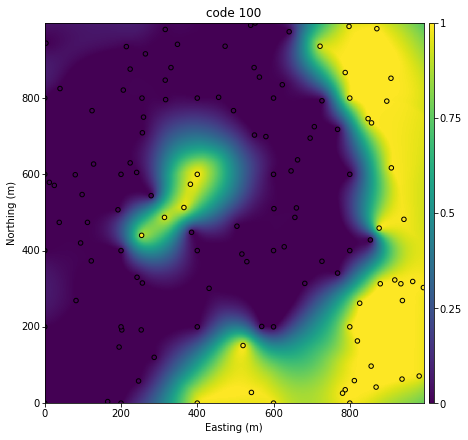

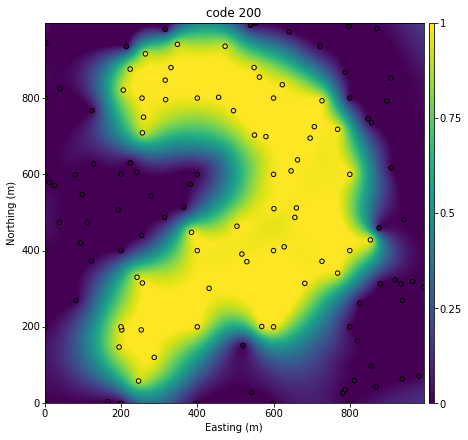

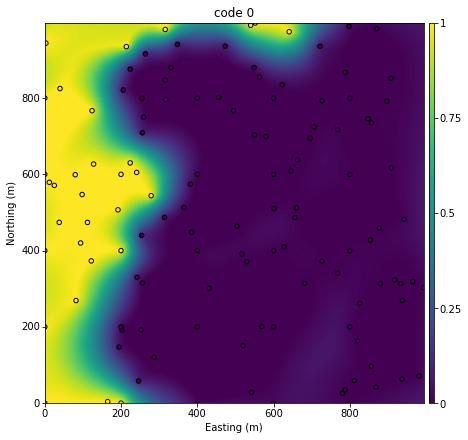

In [10]:
std_results = helpers.standardize([ind_krig['code 100'], ind_krig['code 200'], ind_krig['code 0']])
for idx, c in enumerate(codes):
    gs.pixelplt(std_results[idx], gsgrid, title='code {}'.format(int(c)), figsize = (7,7), pointdata=data, pointvar='ind_{}'.format(c), pointkws={'marker':'o', 's':20, 'edgecolors': 'k'})

C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat

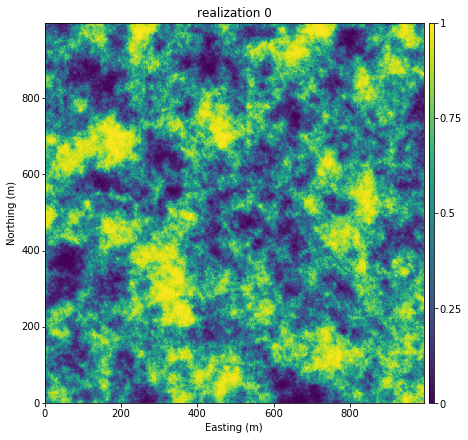

In [11]:
var_range = 200
bb = a2ggrid.bounding_box()
anis = gas.data.AnisotropicTransformation(var_range, var_range, var_range, 0, 0, 0)
nei = gas.data.KDTree(ps, 12, anis)
sf = gas.data.SearchFilter.no_filter()
values = np.zeros(ps.size())
seed = 123257
cov = [gas.compute.Covariance.exponential(1.0, var_range, var_range, var_range, 0., 0., 0.)]
tbsim = gas.compute.Tbsim.multi_realization(seed, 10, a2ggrid, 2500, cov, ps, values)
results = tbsim.simulate(a2ggrid, 10, 0)
results = [norm.cdf(lst) for lst in results]
gs.pixelplt(results[0], gsgrid, title='realization {}'.format(0), figsize = (7,7), pointdata=data, pointkws={'marker':'o', 's':20, 'edgecolors': 'k'})

C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat

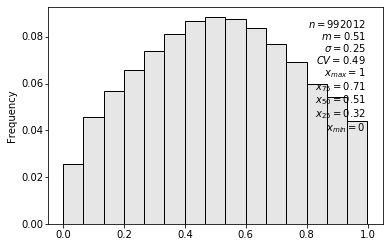

In [12]:
gs.histplt(results[0])

C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat

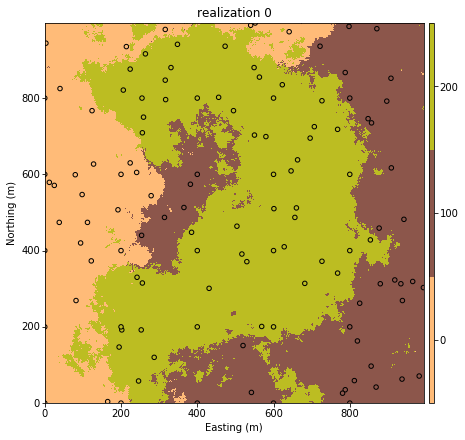

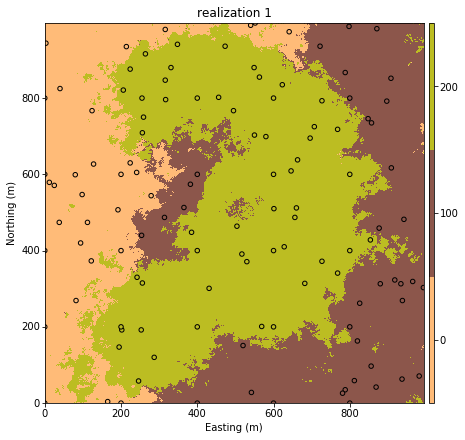

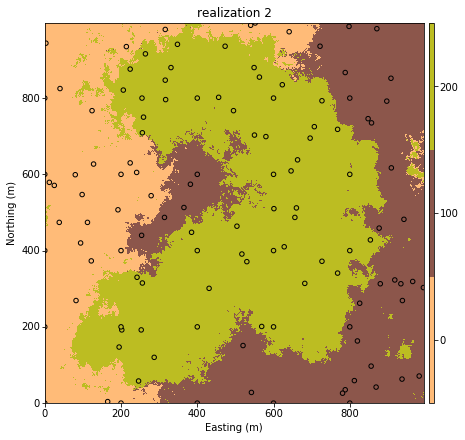

In [13]:
cat_reals = helpers.cat_sampler([ind_krig['code 200'], ind_krig['code 100'], ind_krig['code 0']], [200,100,0], results)
for i in range(0,3):
    gs.pixelplt(np.array(cat_reals[i]), gsgrid, title='realization {}'.format(i), figsize = (7,7), pointdata=data, pointvar='code', pointkws={'marker':'o', 's':20, 'edgecolors': 'k'})

In [14]:
anis = gas.data.AnisotropicTransformation(10000, 10000, 10000, 0, 0, 0)
nei = gas.data.KDTree(ps, 1, anis)
sf = gas.data.SearchFilter.no_filter()
est = gas.compute.NNEstimator.KNN(nei, sf, a2ggrid, data.data.code)
target = est.compute(a2ggrid, 0)

In [15]:
#gs.pixelplt(target, gsgrid, title='NN', figsize = (7,7), pointdata=data, pointvar='code', pointkws={'marker':'o', 's':20, 'edgecolors': 'k'})

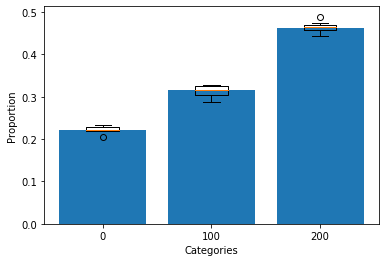

In [16]:
proportions.cat_plot(target, cat_reals, weights=None)

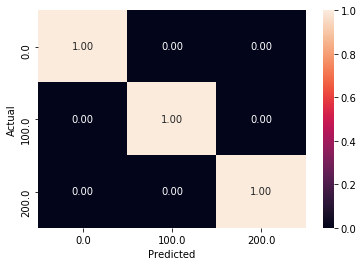

In [17]:
proportions.back_flag(a2ggrid, cat_reals, data.data.x, data.data.y, None, data.data.code)

In [18]:
ind_reals = helpers.reals_to_indicators(cat_reals)

Calculating experimental variograms for step 100
Calculating experimental variograms for step 200
Calculating experimental variograms for step 300
Calculating experimental variograms for step 400
Calculating experimental variograms for step 500


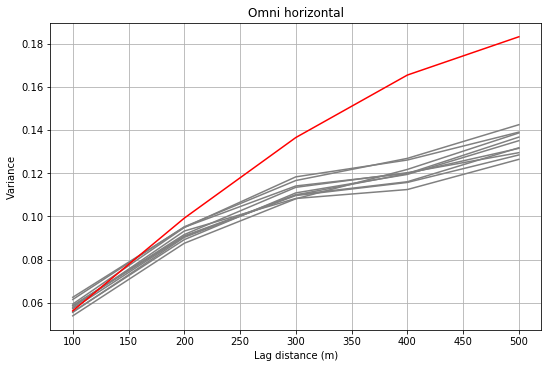

In [19]:
vargrid = variogram_on_grid.Variogram_on_Grid(a2ggrid.dim()[0], a2ggrid.dim()[1], a2ggrid.dim()[2], ind_reals['ind_0'], 5, 100)
vargrid.calculate()
vargrid.plot(1, 1, variograms['code 0'])

Calculating experimental variograms for step 100
Calculating experimental variograms for step 200
Calculating experimental variograms for step 300
Calculating experimental variograms for step 400
Calculating experimental variograms for step 500


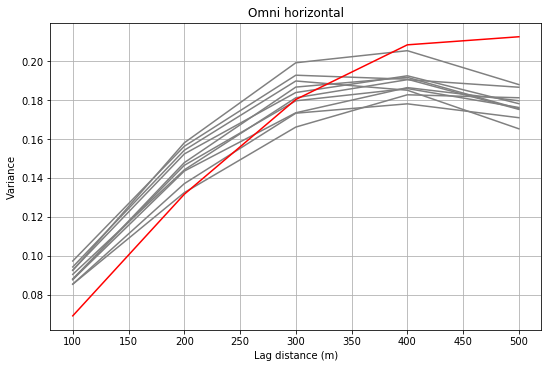

In [20]:
vargrid = variogram_on_grid.Variogram_on_Grid(a2ggrid.dim()[0], a2ggrid.dim()[1], a2ggrid.dim()[2], ind_reals['ind_100'], 5, 100)
vargrid.calculate()
vargrid.plot(1, 1, variograms['code 100'])

Calculating experimental variograms for step 100
Calculating experimental variograms for step 200
Calculating experimental variograms for step 300
Calculating experimental variograms for step 400
Calculating experimental variograms for step 500


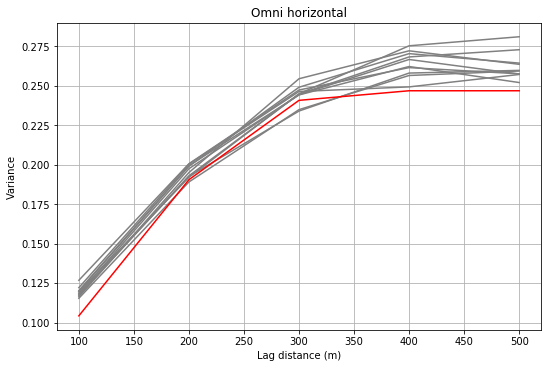

In [21]:
vargrid = variogram_on_grid.Variogram_on_Grid(a2ggrid.dim()[0], a2ggrid.dim()[1], a2ggrid.dim()[2], ind_reals['ind_200'], 5, 100)
vargrid.calculate()
vargrid.plot(1, 1, variograms['code 200'])